In [1]:
#Anil Kumar Koundal, 26-09-2018
#Email: anilkumar991.ak@gmail.com
'''
This python script is written for Random Forest Classification of images.
User needs to provide path of directory containing subdiectories of images.
It is assumed that image in same subdirectory belong to same class.
'''

'\nThis python script is written for Random Forest Classification of images.\nUser needs to provide path of directory containing subdiectories of images.\nIt is assumed that image in same subdirectory belong to same class.\n'

In [2]:
import pandas as pd
from glob import glob
import cv2
import numpy as np
from sys import argv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle

In [3]:
#path=argv[1]

In [4]:
path='/media/anil/Data/data/subsetSubCellular'
def load_files(path):
	list_dir=glob(path+str('/*/'))
	list_dir.sort()
	file_list={}
	for i in range(len(list_dir)):
		file_list[i + 1]=glob(list_dir[i]+str('/*.png'))
	df=pd.DataFrame(list(file_list.items()))
	fl=df[1]
	images=[]
	label=[]
	for i in range(len(fl)):
		ls=fl[i]
		for j in range(len(ls)):
			images.append(cv2.imread(ls[j]))
			label.append(i)
	images=np.asarray(images)
	label=np.asarray(label)
	return images,label


images,labels=load_files(path)
#np.save('images.npy',images)
#np.save('label.npy',label)
#images=np.load('images.npy')
#labels=np.load('labels.npy')

In [5]:
label_names={0:'Cytoplasm', 1:'Endosome', 2:'ER', 3:'Golgi', 4:'Mitochondrian', 5:'Nuclear Periphery',
		6:'Nucleolus', 7:'Nucleus', 8:'Peroxisome', 9:'Spindle Pole', 10:'Vacuole'}

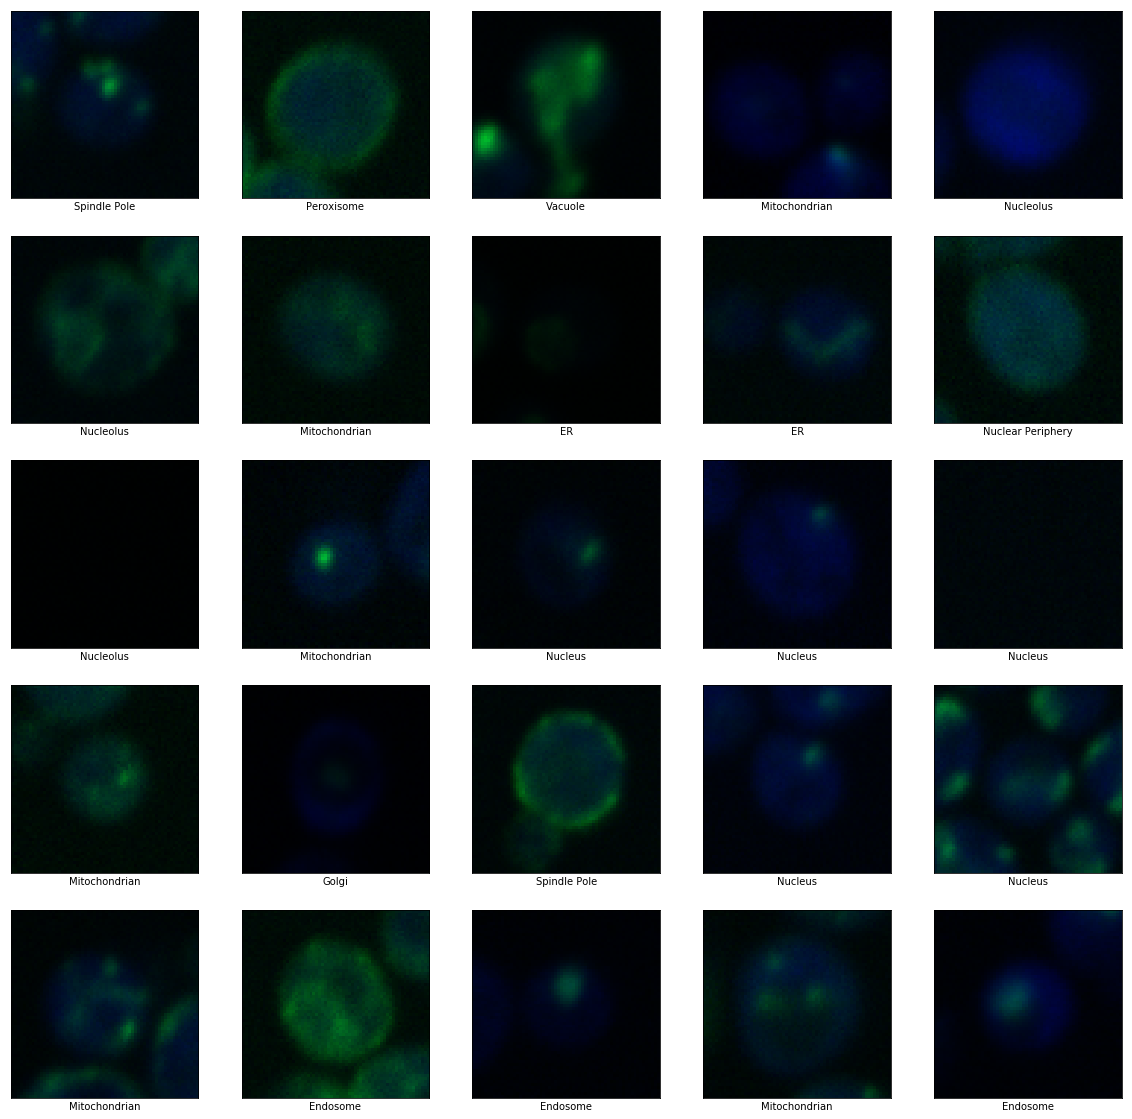

In [6]:
#To view images and their respective labels
rand_ind=np.random.randint(0,1100,25)
plt.figure(figsize=(20,20))
for i in range(len(rand_ind)):
	plt.subplot(5,5,i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(images[rand_ind[i]],cmap=plt.cm.binary)
	plt.xlabel(label_names[labels[rand_ind[i]]])

plt.show()

In [7]:
images_=images.reshape(images.shape[1]*images.shape[2]*images.shape[3],images.shape[0]).T
labels=labels.reshape(labels.shape[0],)

In [8]:
#function to shuffle data
def shuffle_data(X,y):
	idx=np.random.permutation(len(X))
	X,y=X[idx],y[idx]
	return X,y

In [9]:
images_,labels=shuffle(images_,labels,random_state=42)

X_train, X_test, y_train, y_test = train_test_split(images_, labels, test_size = 0.2, random_state=42)

In [10]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
predicted_labels=clf.predict(X_test)

/home/anil/.pyenv/versions/3.6.1/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
print("Accuracy Score: "+str(accuracy_score(y_test,predicted_labels)))

Accuracy Score: 0.9318181818181818


In [12]:
print("Confusion Matrix: \n"+str(confusion_matrix(y_test,predicted_labels)))

Confusion Matrix: 
[[12  1  0  0  0  0  0  0  0  0  0]
 [ 1 14  0  0  0  0  0  0  0  0  0]
 [ 0  2 19  0  1  0  0  0  0  0  0]
 [ 0  1  0 19  0  0  0  0  0  0  0]
 [ 0  0  0  1 21  1  0  0  0  0  0]
 [ 0  0  0  0  1 17  3  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0  1 31  1  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0  0  0  0  1 21]]


In [13]:
ind=np.random.randint(len(X_test))
pred=clf.predict([X_test[ind]])
print("\nPredicted Label: ",label_names[pred[0]])


Predicted Label:  Spindle Pole


In [14]:
#Function for predicting Random Image from dataset

def pred_func(pred_path):
	pred_im=cv2.imread(pred_path)
	pred_im_=pred_im.reshape(pred_im.shape[0]*pred_im.shape[1]*pred_im.shape[2],1).T
	p=clf.predict(pred_im_)
	plt.imshow(pred_im,cmap=plt.cm.binary)
	plt.xlabel('Predicted Label: '+label_names[p[0]])
	plt.show()

In [15]:
#pred_func(file_path)

In [16]:
#Cross Validation
scores=cross_val_score(clf,images_,labels,cv=5)
print(np.mean(scores))

0.9372727272727273


In [17]:
#Parameters tuning by using GridSearchCV
param_grid={'n_estimators':[50,100,200],'max_features':['auto','sqrt','log2']}
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_test,y_test)
#get best parameters
CV_rfc.best_params_
#best score
CV_rfc.best_score_
#Get mean score all parameters
means=CV_rfc.cv_results_['mean_test_score']
#Get std of all parameters
stds=CV_rfc.cv_results_['std_test_score']

/home/anil/.pyenv/versions/3.6.1/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [18]:
#Another way to summarize GridSearchCV results
for mean, std, params in zip(means, stds, CV_rfc.cv_results_['params']):
	print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.677 (+/-0.127) for {'max_features': 'auto', 'n_estimators': 50}
0.723 (+/-0.145) for {'max_features': 'auto', 'n_estimators': 100}
0.691 (+/-0.142) for {'max_features': 'auto', 'n_estimators': 200}
0.673 (+/-0.069) for {'max_features': 'sqrt', 'n_estimators': 50}
0.705 (+/-0.145) for {'max_features': 'sqrt', 'n_estimators': 100}
0.714 (+/-0.147) for {'max_features': 'sqrt', 'n_estimators': 200}
0.468 (+/-0.148) for {'max_features': 'log2', 'n_estimators': 50}
0.468 (+/-0.123) for {'max_features': 'log2', 'n_estimators': 100}
0.459 (+/-0.159) for {'max_features': 'log2', 'n_estimators': 200}


In [ ]:
#Save model
filename = 'RFC.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
#load model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)
print("\nAccuracy Score: ", accuracy_score(y_test,result))